# A common interface for handling gridded data

We've already seen that astropy has a Table class that provides a uniform way of reading, manipulating, and writing table data. Similarly, the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package provides an [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData) class that provide a common interface to datasets that consist of an n-dimensional array optionally with WCS information. In addition, this sub-package provides a set of utilities that can operate on NDData objects as well as Numpy arrays.

**Note:** This sub-package is still under development, so some aspects shown here may become easier in future.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create an NDData object</li>
<li>Create/read in a CCDData object</li>
<li>Extract cutouts from image data with WCS information</li>
<li>Resize n-dimensional data</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.nddata. For more information about the features presented below as well as other available features, you can read the
[astropy.nddata documentation](https://docs.astropy.org/en/stable/nddata/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating an NDData object

The main class in the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package is [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData):

In [2]:
from astropy.nddata import NDData

The simplest way to initialize NDData is with a data array:

In [4]:
import numpy as np
data = np.random.random((16, 16, 16))

In [5]:
ndd1 = NDData(data)

In [6]:
ndd1

NDData([[[5.55714356e-01, 3.86940921e-01, 2.09466994e-02, ...,
          9.40940249e-01, 2.71561224e-01, 6.72497524e-01],
         [3.47193563e-01, 4.79791334e-01, 3.59967759e-01, ...,
          1.18512054e-01, 8.24035658e-01, 2.30586107e-01],
         [8.32087605e-01, 9.66451977e-01, 5.02884166e-01, ...,
          4.33980423e-01, 8.17215376e-01, 1.21491513e-01],
         ...,
         [1.59797325e-01, 8.80051684e-01, 6.44716746e-01, ...,
          9.26078560e-01, 6.84463667e-01, 3.12481746e-01],
         [5.29583353e-01, 6.89304131e-01, 9.69913410e-01, ...,
          7.92273251e-01, 6.42023635e-01, 8.37441276e-01],
         [5.83615308e-01, 8.40852719e-01, 9.98375252e-01, ...,
          5.00411236e-01, 9.38363614e-02, 8.05004534e-01]],

        [[8.54184852e-01, 4.97964693e-01, 4.72348963e-01, ...,
          3.16017300e-01, 6.30824928e-01, 9.61019629e-01],
         [2.16847111e-01, 5.29200763e-01, 8.90169583e-01, ...,
          9.92648960e-01, 7.25940038e-01, 8.60436800e-01],
        

The real value from NDData comes from the ability to add other meta-data, such as the unit, a mask, or WCS information:

In [7]:
from astropy import units as u
from astropy.wcs import WCS
wcs = WCS(naxis=3)
mask = data > 0.5

In [9]:
ndd2 = NDData(data, mask=mask, unit=u.Jy, wcs=wcs)

In [14]:
ndd2.unit

Unit("Jy")

It is also possible to attach uncertainties:

In [16]:
from astropy.nddata import StdDevUncertainty
uncertainty = StdDevUncertainty(data/10)
ndd3 = NDData(data, uncertainty=uncertainty)

## Using the CCDData class

For now, NDData is just a data container, so it does not have useful methods on it. A more useful class is [CCDData](http://docs.astropy.org/en/stable/api/astropy.nddata.CCDData.html#astropy.nddata.CCDData) which is a sub-class of NDData and is a good example to demonstrate NDData functionality:

In [24]:
from astropy.nddata import CCDData

The CCDData class recognizes FITS files:

In [27]:
ccd = CCDData.read("data/gc_2mass_k.fits", unit="count")
ccd

CCDData([[563.1581 , 540.4065 , 524.3385 , ..., 498.93182, 501.9532 ,
          640.75134],
         [514.72516, 586.9167 , 514.5878 , ..., 505.34076, 504.9287 ,
          506.39362],
         [510.01007, 510.19318, 521.3172 , ..., 532.62427, 515.7323 ,
          526.5816 ],
         ...,
         [530.24384, 532.5785 , 536.1492 , ..., 557.43585, 510.60516,
          517.9296 ],
         [521.363  , 524.3385 , 518.0212 , ..., 540.0403 , 546.3118 ,
          544.25183],
         [519.6692 , 525.71185, 522.8278 , ..., 544.7096 , 522.2785 ,
          543.06165]])

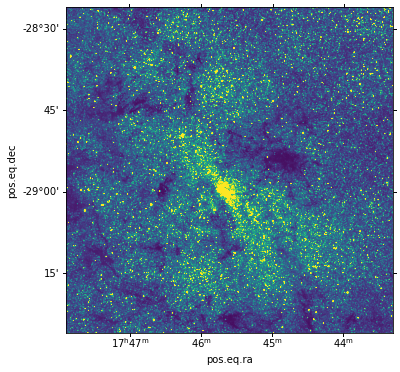

In [30]:
plt.subplot(projection=ccd.wcs)
plt.imshow(ccd.data, vmax=800)
plt.show()

A useful aspect of NDData classes like CCDData is that they can be sliced like Numpy arrays and this automatically slices the mask, uncertainty, and WCS (if present):

In [32]:
subccd = ccd[100:300,200:400]

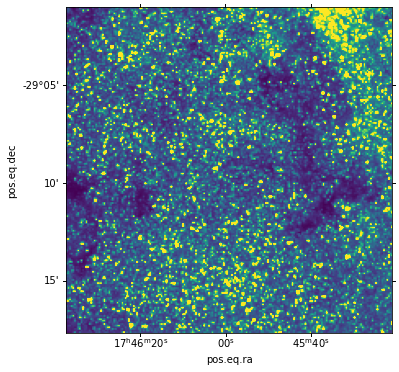

In [33]:
plt.subplot(projection=subccd.wcs)
plt.imshow(subccd.data, vmax=800)
plt.show()

Another useful feature is the ability to do arithmetic between CCDData objects and have uncertainties propagate automatically:

In [34]:
ccd1 = CCDData([1, 2, 3], unit='count',
               uncertainty=StdDevUncertainty([1, 1.2, 1.5]))
ccd2 = CCDData([0.5, 0.5, 0.5], unit='count',
               uncertainty=StdDevUncertainty([0.2, 0.1, 0.3]))

In [35]:
ccd_sub = ccd1.subtract(ccd2)

In [36]:
ccd_sub

CCDData([0.5, 1.5, 2.5])

Note however that at the moment this framework does not understand correlated errors!

In [38]:
ccd1.divide(ccd1).uncertainty

StdDevUncertainty([1.41421356, 0.84852814, 0.70710678])

## Extracting cutouts from images

As seen above, we can easily extract cutouts of NDData objects by using slicing - however, the astropy.nddata sub-package also provides a [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html#astropy.nddata.Cutout2D) class that can be used to generate cutouts from data, either as NDData objects or as plain arrays and WCS objects:

In [39]:
from astropy.nddata import Cutout2D

One of the main benefits of this class is that allows cutouts to be extracted by specifying celestial coordinates rather than just pixel coordinates:

In [40]:
from astropy.coordinates import SkyCoord
galcen = SkyCoord(0*u.deg, 0*u.deg, frame="galactic")

In [41]:
cutout = Cutout2D(ccd.data, galcen, 20*u.arcmin, wcs=ccd.wcs)

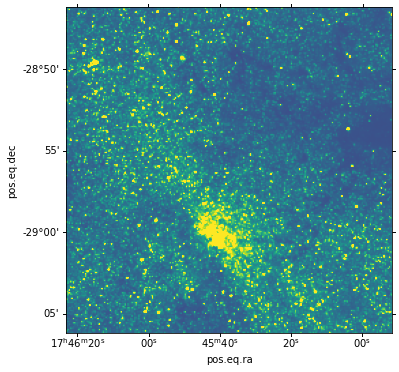

In [43]:
plt.subplot(projection=cutout.wcs)
plt.imshow(cutout.data, vmin=300, vmax=1000)

The Cutout2D object also retains information about where it was extracted from in the image:

<WCSAxesSubplot:>

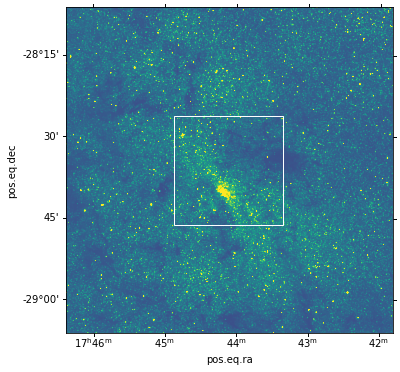

In [47]:
plt.subplot(projection=cutout.wcs)
plt.imshow(ccd.data, vmin=300, vmax=1000)
cutout.plot_on_original(color="white")

and we can therefore also convert positions in the cutout back to positions in the original image:

In [48]:
cutout.to_original_position((20, 30))

(257, 268)

## Resizing images

Another set of useful functions in astropy.nddata are [block_reduce](http://docs.astropy.org/en/stable/api/astropy.nddata.block_reduce.html#astropy.nddata.block_reduce) and [block_replicate](http://docs.astropy.org/en/stable/api/astropy.nddata.block_replicate.html#astropy.nddata.block_replicate) which can be used to downsample and upsample data by integer factors:

In [50]:
from astropy.nddata import block_reduce, block_replicate

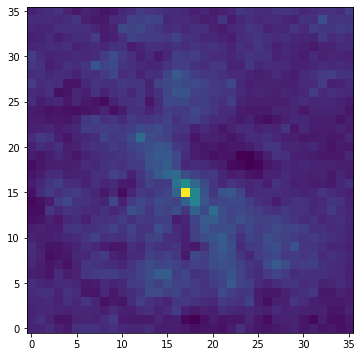

In [58]:
plt.imshow(block_reduce(ccd.data, 20))

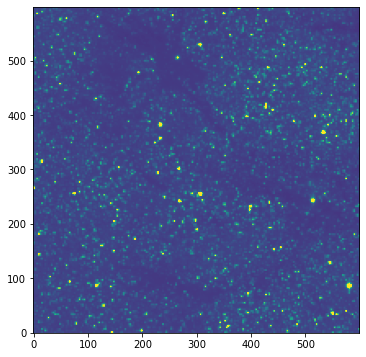

In [65]:
plt.imshow(block_replicate(ccd.data[:200, :200], 3), vmin=35, vmax=150)

For now, this does not properly support NDData objects or scaling the WCS information (see [astropy/astropy#4796](https://github.com/astropy/astropy/issues/4796) for an example of as astropy feature request!).

<center><i>This notebook was written by <a href="https://aperiosoftware.com/">Aperio Software Ltd.</a> &copy; 2019, and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)